In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for SDOF Duffing oscillator with x.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for SDOF Duffing oscillator.\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

# Drift equation discovery

In [2]:
import numpy as np

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
            
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
    
 
    ind = len(D[0])
    
    return D, ind

In [3]:

import numpy as np

"""
A Duffing Van der pol system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 2
    k = 1000
    k3 = 100000
    sigma = 1
    
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    delmat = np.row_stack(([np.sqrt(dt), 0],[(dt**1.5)/2, (dt**1.5)/(2*np.sqrt(3))]))
    
    y1 = []
    y2 = []
    xz = []
    xzs = []
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        for n in range(len(t)-1):

            delgen = np.dot(delmat, np.random.normal(0,1,2))
            dW = delgen[0]
            dZ = delgen[1]
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m) * x0[0]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        zint = x[1,0:-1]
        xfinal = x[1,1:] 
        xmz = (xfinal - zint) # 'x(t)-z' vector
        xmz2 = np.multiply(xmz, xmz)
        xz.append(xmz)
        xzs.append(xmz2)
        
    xz = pow(dt,-1)*np.mean(np.array(xz), axis = 0)
    xzs = pow(dt,-1)*np.mean(np.array(xzs), axis = 0)
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    time = t[0:-1]
    
    return xz, xzs, y1, y2, time

In [4]:
T = 1

# Response generation:
x1, x2 = 0.125, 0 # initial displacement for duffing
xdt, xdts, y1, y2, t_eval = duffing(x1, x2, T)

Text(0.5, 1.0, 'Velocity')

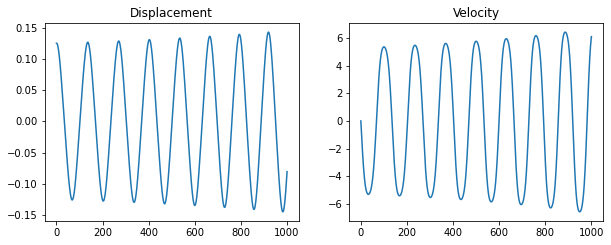

In [5]:
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1); plt.plot(np.mean(y1, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

Text(0.5, 1.0, 'Velocity')

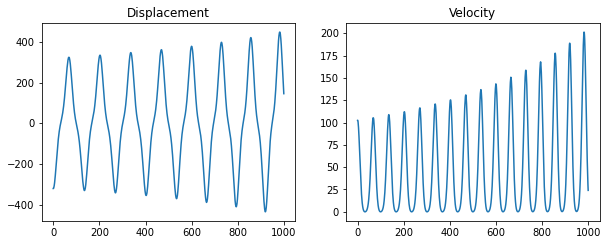

In [6]:
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1); plt.plot(xdt)
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(xdts)
plt.title('Velocity')

In [7]:
y1.shape, y2.shape

((200, 1001), (200, 1001))

In [8]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary = np.mean(libr, axis = 0)

In [9]:
import pandas as pd
LLL = pd.DataFrame(Dictionary)
# LLL.corr()

In [10]:
D = Dictionary
xdts = xdt

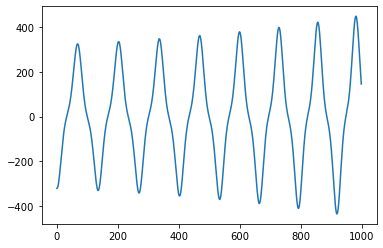

In [11]:
plt.plot(xdts)

In [12]:
print(xdts.shape)
print(D.shape)

(1000,)
(1000, 21)


In [13]:
Dict = D.reshape(-1,order='F')
Dict.shape

(21000,)

In [14]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[7.0],[8.0],[11.0],[19.0]]), 'Value': matlab.double([[-1000.5658788936705],[-2.001740160040777],[-99967.59815910431],[-0.06770312232218226],[9.587636145646005],[0.07215612483418313]])}


In [15]:
DMOut['Value']

matlab.double([[-1000.5658788936705],[-2.001740160040777],[-99967.59815910431],[-0.06770312232218226],[9.587636145646005],[0.07215612483418313]])

In [16]:
np.array(DMOut['Value'])

array([[-1.00056588e+03],
       [-2.00174016e+00],
       [-9.99675982e+04],
       [-6.77031223e-02],
       [ 9.58763615e+00],
       [ 7.21561248e-02]])

In [17]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
d

[-1000.5658788936705,
 -2.001740160040777,
 -99967.59815910431,
 -0.06770312232218226,
 9.587636145646005,
 0.07215612483418313]

In [18]:
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
b

[1, 2, 6, 7, 10, 18]

In [19]:
initz0_1 = np.zeros(D.shape[1])
for i in b:
    initz0_1[i] = 1
    
initz0_1

array([0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0.])

In [20]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [21]:
D_std = np.std(D[:,1:],axis = 0)

In [22]:
D_std

array([9.27440902e-02, 4.42720690e+00, 6.37123936e-03, 3.06647023e-01,
       1.23452171e+01, 1.31926613e-03, 2.97726498e-02, 1.38325241e+00,
       1.28461038e+02, 1.20210424e-04, 3.21323095e-03, 7.25759478e-02,
       6.85080681e+00, 4.84090659e+02, 4.13785844e-02, 1.74251346e+00,
       1.07345777e-02, 3.07391855e-01, 3.06961413e-01, 2.32682140e+01])

In [23]:
D_std = D_std.reshape(1,-1)

In [24]:
a = np.diag(1/D_std)

In [25]:
D1 = D*np.diag(1/D_std)

In [26]:
X = D1[:,1:]
y = xdts
initz0 = initz0_1[1:]
tol = 0.0001
verbosity = True


DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -2083.5165740236803
Iteration = 1  log(Likelihood) = -1999.3176492316463
Iteration = 2  log(Likelihood) = -1999.3119826448153
Iteration = 3  log(Likelihood) = -1999.3119817201868
{'zmean': array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), 'wmean': array([-6.15782562e-15, -9.28257811e+01, -8.86713225e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.31937590e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00]), 'wCOV': array([[ 2.65566740e-03,  1.85526191e-18,  1.03925617e-19,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.98272658e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,

C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\hp\AppData\Local\Temp\ipykernel_2100\3433819908.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


<StemContainer object of 3 artists>

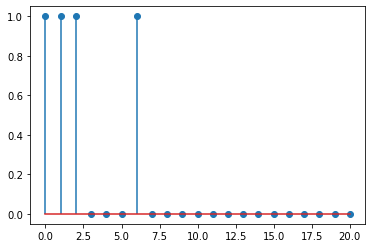

In [27]:
plt.stem(DS['zmean'])   

In [28]:
(DS["wmean"][1:]) / (D_std)

array([[-1.00088082e+03, -2.00287279e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.00008320e+05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [29]:
for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

-1000.8808201077443
-2.0028727921094567
-100008.320155249


In [30]:
DS["wmean"][1:] / (D_std) .reshape(-1)

array([-1.00088082e+03, -2.00287279e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.00008320e+05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

# Diffusion equation discovery

In [1]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        # for sin(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)
            #  or,
            # ind = ind+1
            # new = np.sin(xt[i,:])
            # D = np.insert(D, ind, new, axis=1)
            
        # for cos(x)
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
    
 
    ind = len(D[0])
    
    return D, ind

"""
A Duffing Van der pol system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 2
    k = 1000
    k3 = 100000
    sigma = 10
    
    # solution by Taylor 1.5 strong scheme Run with dt=0.01
    # -------------------------------------------------------
    # T = 1
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    delmat = np.row_stack(([np.sqrt(dt), 0],[(dt**1.5)/2, (dt**1.5)/(2*np.sqrt(3))]))
    
    y1 = []
    y2 = []
    xz = []
    xzs = []
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        for n in range(len(t)-1):

            delgen = np.dot(delmat, np.random.normal(0,1,2))
            dW = delgen[0]
            dZ = delgen[1]
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m) * x0[0]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        zint = x[1,0:-1]
        xfinal = x[1,1:] 
        xmz = (xfinal - zint) # 'x(t)-z' vector
        xmz2 = np.multiply(xmz, xmz)
        xz.append(xmz)
        xzs.append(xmz2)
        
    xz = pow(dt,-1)*np.mean(np.array(xz), axis = 0)
    xzs = pow(dt,-1)*np.mean(np.array(xzs), axis = 0)
    
    y1 = np.array(y1)
    y2 = np.array(y2)
    time = t[0:-1]
    
    return xz, xzs, y1, y2, time

1
2
3
4
5
6
7
8
9
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
41
42
43
44
45
46
47
48
49
51
52
53
54
55
56
57
58
59
61
62
63
64
65
66
67
68
69
71
72
73
74
75
76
77
78
79
81
82
83
84
85
86
87
88
89
91
92
93
94
95
96
97
98
99
Iteration = 0  log(Likelihood) = 3937.2357779388108
Iteration = 1  log(Likelihood) = 5304.571146965922
Iteration = 2  log(Likelihood) = 5457.868329688951
Iteration = 3  log(Likelihood) = 5458.643681327865
Iteration = 4  log(Likelihood) = 5458.644102945878
Iteration = 5  log(Likelihood) = 5458.644103125316
{'zmean': array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), 'wmean': array([1.03286603e-17, 0.00000000e+00, 0.00000000e+00, 6.89656895e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.0000

C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:314: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:286: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:286: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:287: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_11272/559932011.py:287: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


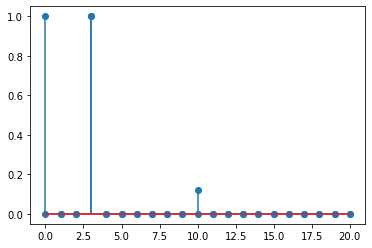

In [21]:
import numpy as np
from numpy import linalg as LA
from numpy.random import gamma as IG
from numpy.random import beta
from numpy.random import binomial as bern
import fun_library0
import fun_gibbs
import fun_resp_stochastic
from numpy.random import multivariate_normal as mvrv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

T = 1
np.random.seed(4)
# Response generation:
x1, x2 = 0.005, 0 # initial displacement condition
gg, xbt, y1, y2, t_eval = duffing(x1, x2, T)

# Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1]))
    Dtemp, nl = library(data, 4, 0)
    libr.append(Dtemp)
libr = np.array(libr)
D = np.mean(libr, axis = 0)
# Bayesian Interference:
# D, xdts, muD, sdvD = fun_library0.BayInt(D, xbt)
xdts = xbt

# Adding 5% of the std. of acceleration as noise:
# xdts = xdts + np.random.normal(0, 0.1*np.std(xdts), len(xdts))

# Residual variance:
err_var = fun_library0.res_var(D, xdts)

"""
# Gibbs sampling:
"""
# Hyper-parameters
ap, bp = 0.1, 1 # for beta prior for p0
av, bv = 0.5, 0.5 # inverge gamma for vs
asig, bsig = 1e-4, 1e-4 # invese gamma for sig^2

# Parameter Initialisation:
MCMC = 100  # No. of samples in Markov Chain,
p0 = np.zeros(MCMC)
vs = np.zeros(MCMC)
sig = np.zeros(MCMC)
p0[0] = 0.1
vs[0] = 10
sig[0] = err_var

N = len(xdts)

# Initial latent vector
zval = np.zeros(nl)
zint  = fun_library0.latent(nl, D, xdts)
zstore = np.transpose(np.vstack([zint]))
zval = zint

zval0 = zval
vs0 = vs[0]
mu, BSIG, Aor, index = fun_gibbs.sigmu(zval0, D, vs0, xdts)
Sz = sum(zval)

# Sample theta from Normal distribution
thetar = mvrv(mu, np.dot(sig[0], BSIG))
thetat = np.zeros(nl)
thetat[index] = thetar
theta = np.vstack(thetat)

for i in range(1, MCMC):
    if i%10:
        print(i)
    
    # sample z from the Bernoulli distribution:
    zr = np.zeros(nl) # instantaneous latent vector (z_i):
    zr = zval
    for j in range(nl):
        ztemp0 = zr
        ztemp0[j] = 0
        if np.mean(ztemp0) == 0:
            PZ0 = fun_gibbs.pyzv0(xdts, N, asig, bsig)
        else:
            vst0 = vs[i-1]
            PZ0 = fun_gibbs.pyzv(D, ztemp0, vst0, N, xdts, asig, bsig)
        
        ztemp1 = zr
        ztemp1[j] = 1      
        vst1 = vs[i-1]
        PZ1 = fun_gibbs.pyzv(D, ztemp1, vst1, N, xdts, asig, bsig)
        
        zeta = PZ0 - PZ1  
        zeta = p0[i-1]/( p0[i-1] + np.exp(zeta)*(1-p0[i-1]))
        zr[j] = bern(1, p = zeta, size = None)
    
    zval = zr
    zstore = np.append(zstore, np.vstack(zval), axis = 1)
    
    # sample sig^2 from inverse Gamma:
    asiggamma = asig+0.5*N
    temp = np.matmul(np.matmul(mu.T, LA.inv(BSIG)), mu)
    bsiggamma = bsig+0.5*(np.dot(xdts.T, xdts) - temp)
    sig[i] = 1/IG(asiggamma, 1/bsiggamma) # inverse gamma RVs
    
    # sample vs from inverse Gamma:
    avvs = av+0.5*Sz
    bvvs = bv+(np.matmul(np.matmul(thetar.T, LA.inv(Aor)), thetar))/(2*sig[i])
    vs[i] = 1/IG(avvs, 1/bvvs) # inverse gamma RVs
    
    # sample p0 from Beta distribution:
    app0 = ap+Sz
    bpp0 = bp+nl-Sz # Here, P=nl (no. of functions in library)
    p0[i] = beta(app0, bpp0)
    # or, np.random.beta()
    
    # Sample theta from Normal distribution:
    vstheta = vs[i]
    mu, BSIG, Aor, index = fun_gibbs.sigmu(zval, D, vstheta, xdts)
    Sz = sum(zval)
    thetar = mvrv(mu, np.dot(sig[i], BSIG))
    thetat = np.zeros(nl)
    thetat[index] = thetar
    theta = np.append(theta, np.vstack(thetat), axis = 1)

zstorediff = zstore[:, 51:]    
Zmeandiff = np.mean(zstorediff, axis=1)

thetadiff = theta[:,51:]
mutdiff = np.mean(thetadiff, axis=1)
sigtdiff = np.cov(thetadiff, bias = False)

# Post processing:
mutind = np.where(mutdiff<(np.max(np.abs(mutdiff))*0.02))
Zmeandiff[mutind] = Zmeandiff[mutind]*1e-3
# thetanor = thetadiff[3,:] - np.abs(thetadrift[1,:])
# munormal = np.mean(thetanor)

plt.stem(Zmeandiff)

import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

D_std = np.std(D[:,1:],axis = 0)

D_std = D_std.reshape(1,-1)

a = np.diag(1/D_std)

D1 = D[:,1:]*np.diag(1/D_std)

X = D1
y = xdts
initz0 = Zmeandiff[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

plt.stem(DS['zmean'])   

wmean = (DS["wmean"][1:]) / (D_std)
wmean

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

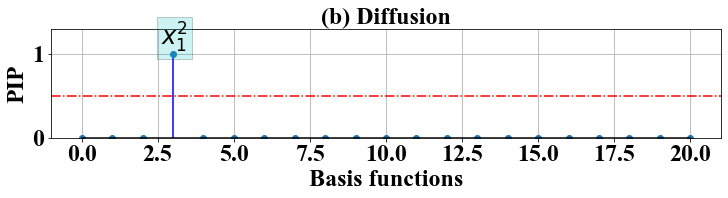

In [38]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(nl))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.xlabel('Basis functions',fontweight='bold')
# plt.ylim([0,2])
plt.ylabel('PIP', fontweight='bold');
plt.title('(b) Diffusion', fontweight='bold',fontsize=24)
plt.grid(True); plt.ylim(0,1.3)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
# plt.text(1.4, 1.1, "$x_1$", bbox=dict(facecolor='c', alpha=0.2), fontsize=24, ha='right')
# plt.text(1.8, 1.1, "$x_2$", bbox=dict(facecolor='c', alpha=0.2), fontsize=24)
plt.text(2.6, 1.1, "$x_1^2$", bbox=dict(facecolor='c', alpha=0.2), fontsize=24)
figure1.savefig('duffing_diff_x.pdf',format='pdf',dpi=600,bbox_inches='tight')

In [25]:
np.sqrt(abs(wmean[0][2]-1000.85))

10.001752595271762

# True value prediction

In [1]:
import numpy as np
import pickle 

Nsamp = 10000
dt = 0.0005
T = 30
t = np.arange(0, T+dt, dt)
dW = np.sqrt(dt)*np.random.randn(10000, 60001)

pickle.dump(dW, open('Forcing_Term_DUFFING.p', 'wb'))

In [2]:
dW.shape

(10000, 60001)

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_DUFFING.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW.shape

(10000, 60001)

In [3]:

import numpy as np

"""
A Duffing system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 1
    k = 1000
    k3 = 100000
    sigma = 10
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 1000 # no. of samples in the run
    
    y1 = []
    y2 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        if (ensemble%1)==0:
            print(ensemble)
        for n in range(len(t)-1):
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m)*x0[0]

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW[ensemble][n] 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        
        
    y1 = np.array(y1)
    y2 = np.array(y2)
    return y1, y2

In [4]:
T = 30

# Response generation:
x1, x2 = 0.05, 0.05 # initial displacement for duffing
y1, y2 = duffing(x1, x2, T)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(1000, 60001)


Text(0.5, 1.0, 'Velocity')

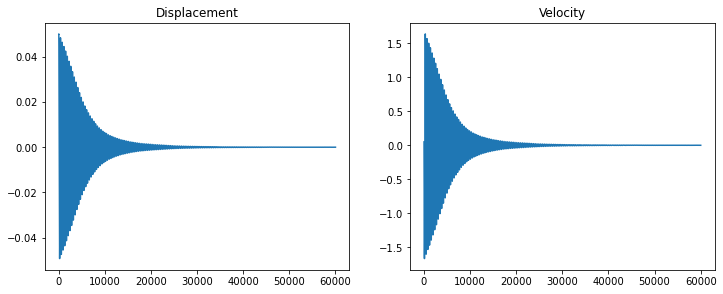

In [5]:
for i in y1:
    if max(i)<1000:
#         print(max(i))
        pass

a = []

for i in y1:
    
    if np.mean(i)<1000:
#         print(np.mean(i))
        a.append(i)
a

a = np.array(a)
print(a.shape)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1); plt.plot(np.mean(a, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

Text(0.5, 1.0, 'Velocity')

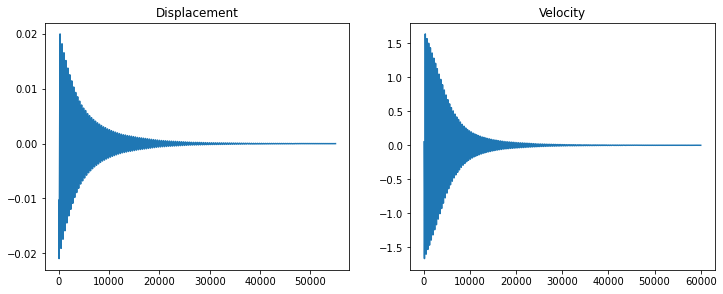

In [6]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1); plt.plot(np.mean(a, axis=0)[5000:])
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

In [7]:
np.mean(a, axis=0)

array([5.00000000e-02, 5.00250000e-02, 5.00342558e-02, ...,
       5.97573583e-06, 5.89230620e-06, 5.80750786e-06])

In [8]:
output = [y1, y2]

In [9]:
import pickle 

pickle.dump(output, open('Duffing_actual_relia_with_x_100ensem_c2.p', 'wb'))

In [10]:
output[0].shape

(1000, 60001)

# Estimated value prediction

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_DUFFING.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
dW.shape

(10000, 60001)

In [3]:

import numpy as np

"""
A Duffing system excited by random noise
----------------------------------------------------------------------
"""
def duffing(x1, x2, T):

    # parameters of Duffing oscillator in Equation
    m = 1
    c = 0.9934
    k = 999.485
    k3 = 99989.5
    sigma = 10.01
    
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 1000 # no. of samples in the run
    
    y1 = []
    y2 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = np.array([x1, x2])
        x = np.vstack(x0)  # Zero initial condition.
        if (ensemble%10)==0:
            print(ensemble)
        for n in range(len(t)-1):
            a1 = x0[1]
            a2 = -(c/m)*x0[1]-(k/m)*x0[0]-(k3/m)*(x0[0]**3)
            b2 = (sigma/m)*x0[0] 

            sol1 = x0[0] + a1*dt 
            sol2 = x0[1] + a2*dt + b2*dW[ensemble][n] 
            x0 = np.array([sol1, sol2])
            x = np.column_stack((x, x0))
        y1.append(x[0,:])
        y2.append(x[1,:])
        
        
        
    y1 = np.array(y1)
    y2 = np.array(y2)
    return y1, y2

In [4]:
T = 30

# Response generation:
x1, x2 = 0.05, 0.05 # initial displacement for duffing
y1, y2 = duffing(x1, x2, T)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


Text(0.5, 1.0, 'Velocity')

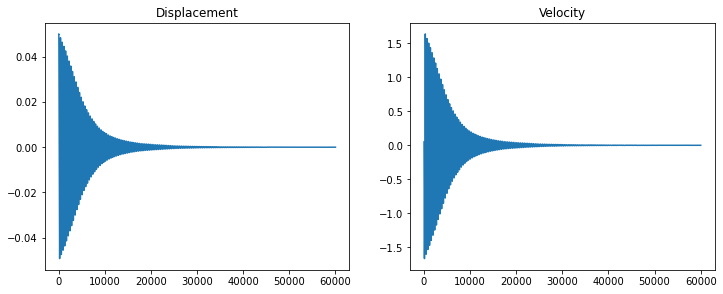

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1); plt.plot(np.mean(y1, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

(1000, 60001)


Text(0.5, 1.0, 'Velocity')

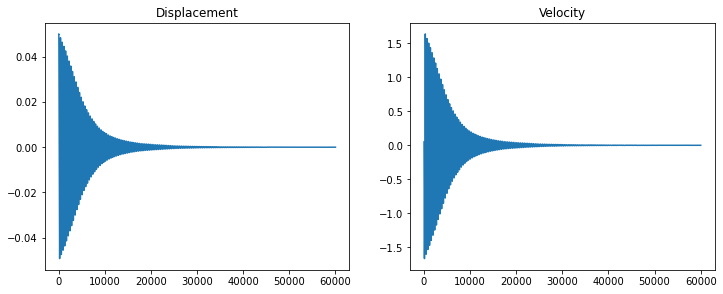

In [6]:
for i in y1:
    if max(i)<1000:
#         print(max(i))
        pass

a = []

for i in y1:
    
    if np.mean(i)<1000:
#         print(np.mean(i))
        a.append(i)
a

a = np.array(a)
print(a.shape)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1); plt.plot(np.mean(a, axis=0))
plt.title('Displacement')
plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
plt.title('Velocity')

Text(0.5, 1.0, 'Displacement')

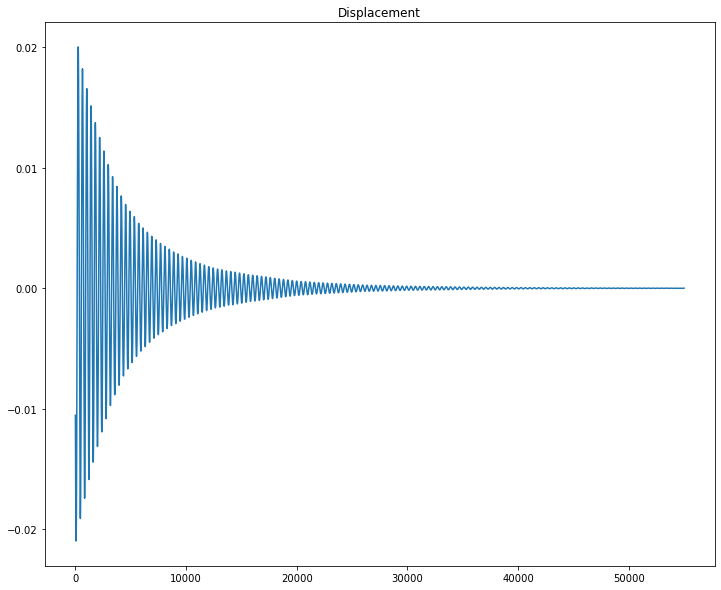

In [7]:
fig = plt.figure(figsize=(12,10))
plt.plot(np.mean(a, axis=0)[5000:])
plt.title('Displacement')
# plt.subplot(2,2,2); plt.plot(np.mean(y2, axis=0))
# plt.title('Velocity')

In [8]:
output = [y1, y2]

In [9]:
import pickle 

pickle.dump(output, open('Duffing_Final_relia_with_x_100ensem_c2.p', 'wb'))

In [10]:
output[0].shape

(1000, 60001)

# Reliability

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
actual_1 = "Duffing_actual_relia_with_x_100ensem_c2.p"
file_actual_1 = open(actual_1, 'rb')
file_obj_actual_1 = pickle.load(file_actual_1)
actual_1 = np.array(file_obj_actual_1)
actual_1.shape

(2, 1000, 60001)

In [4]:
actual_2 = "Duffing_Final_relia_with_x_100ensem_c2.p"
file_actual_2 = open(actual_2, 'rb')
file_obj_actual_2 = pickle.load(file_actual_2)
actual_2 = np.array(file_obj_actual_2)
actual_2.shape

(2, 1000, 60001)

In [5]:
y11 = actual_1[0]
y12 = actual_2[0]
y11.shape, y12.shape

((1000, 60001), (1000, 60001))

In [6]:
np.vstack((y11, y12)).shape

(2000, 60001)

In [7]:
y1_1 = actual_1[0]
y1_1.shape

(1000, 60001)

In [8]:
a=np.linspace(0,30,60001)

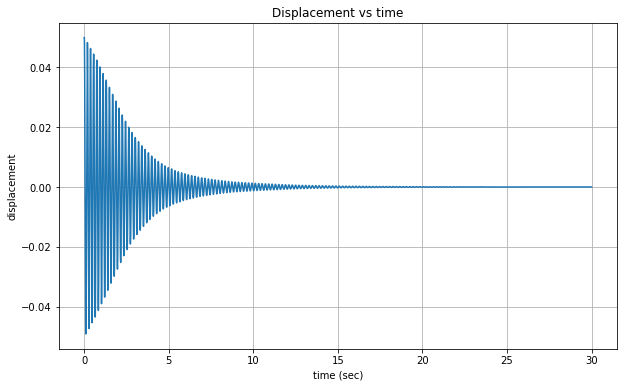

In [9]:
# plt.plot(np.mean(y1_1, axis=0))
plt.figure(figsize=(10,6))
plt.xlim()
plt.plot(a,np.mean(y1_1, axis=0))
plt.title('Displacement vs time')
plt.xlabel('time (sec)')
plt.ylabel('displacement')
plt.grid()
plt.savefig('states_tm.pdf')
plt.show()


In [10]:
y1_1.shape

(1000, 60001)

0.05
Probabilty of Failure : 1.0


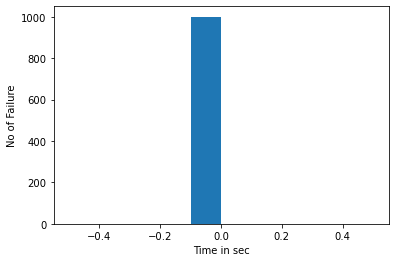

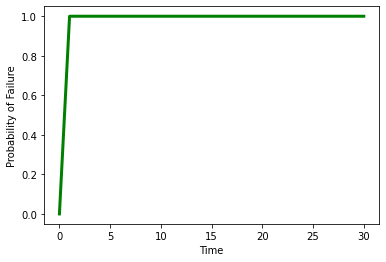

Probabilty of Failure : 1.0


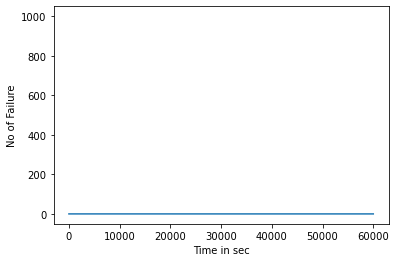

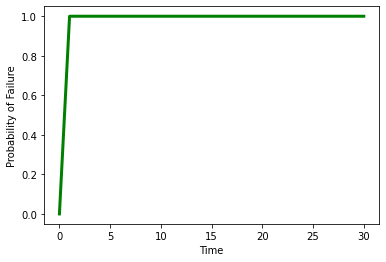

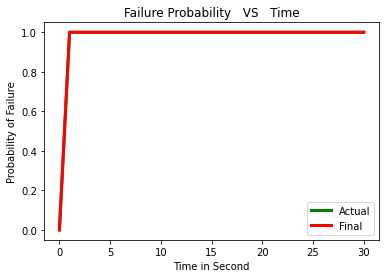

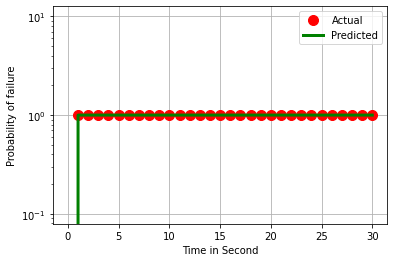

0.05026315789473684
Probabilty of Failure : 0.254


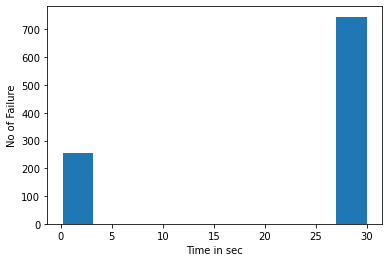

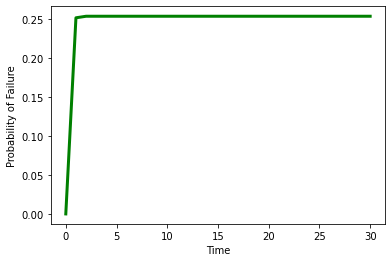

Probabilty of Failure : 0.258


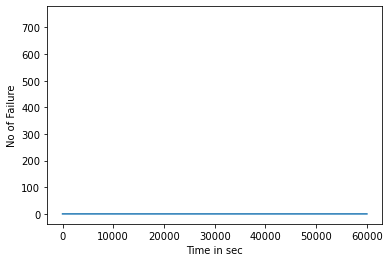

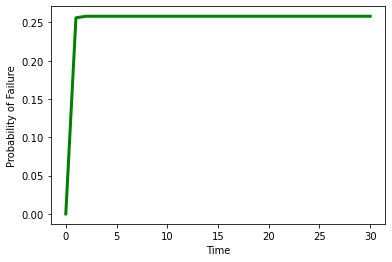

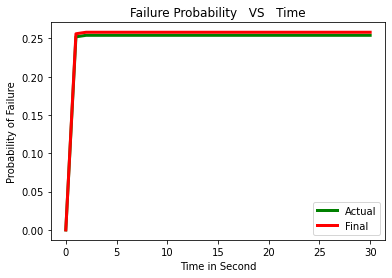

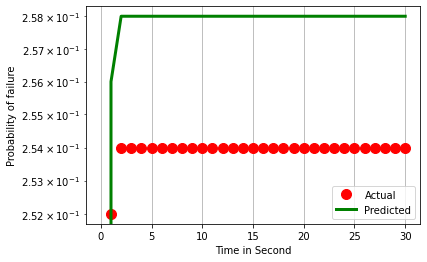

0.05052631578947369
Probabilty of Failure : 0.224


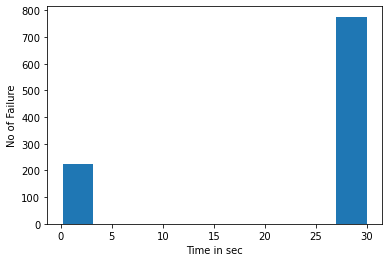

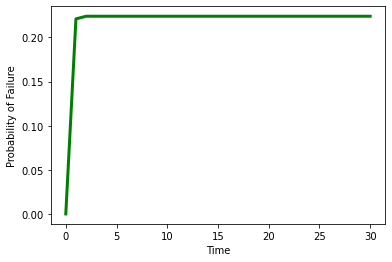

Probabilty of Failure : 0.232


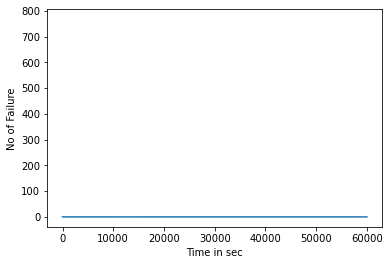

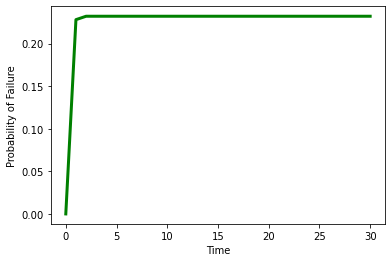

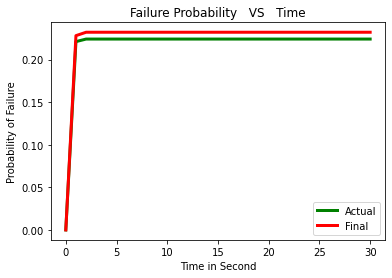

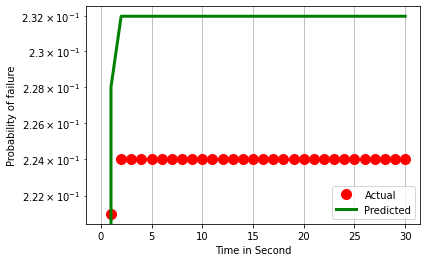

0.05078947368421053
Probabilty of Failure : 0.194


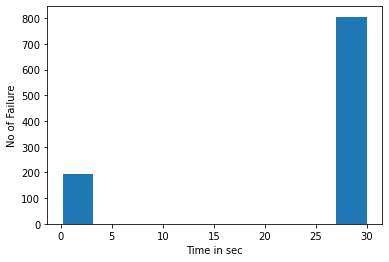

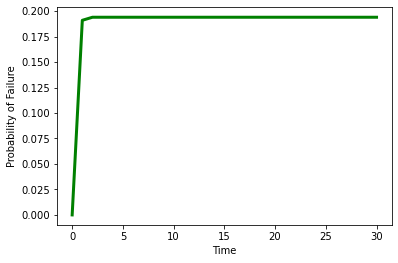

Probabilty of Failure : 0.202


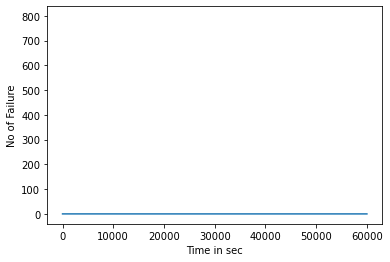

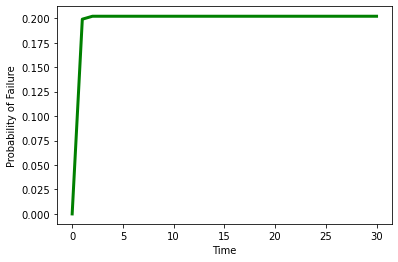

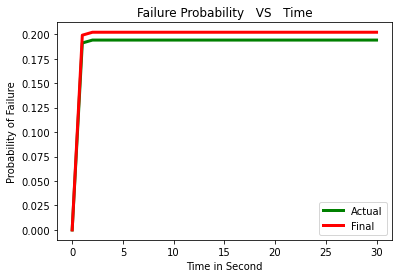

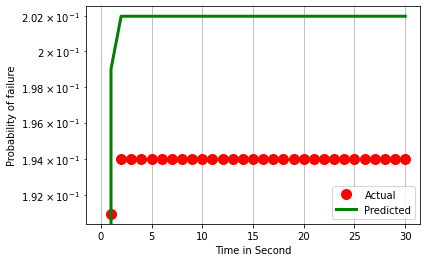

0.05105263157894737
Probabilty of Failure : 0.157


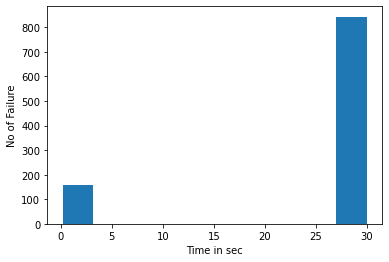

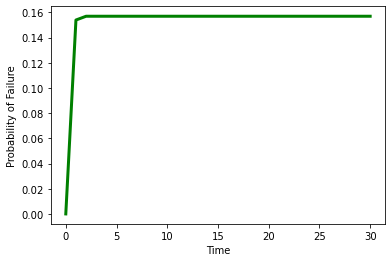

Probabilty of Failure : 0.162


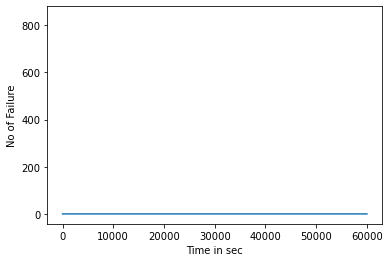

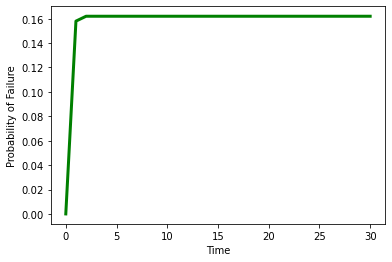

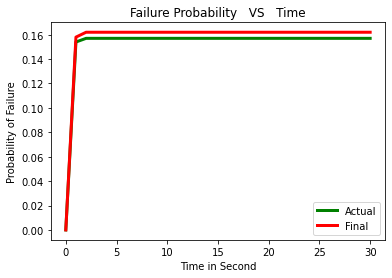

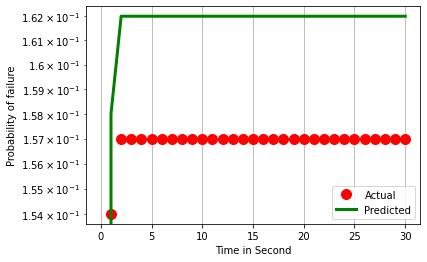

0.05131578947368421
Probabilty of Failure : 0.135


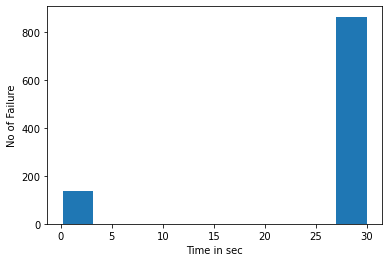

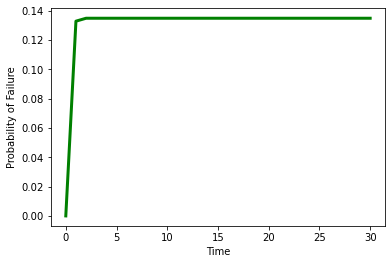

Probabilty of Failure : 0.14


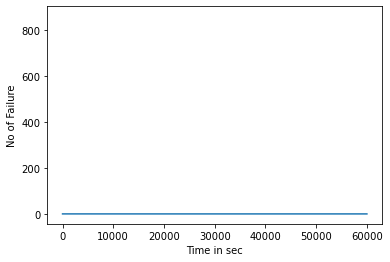

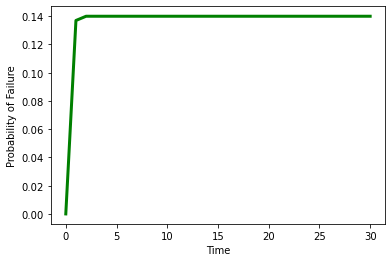

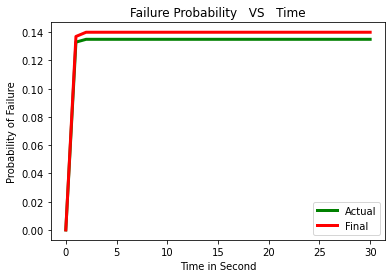

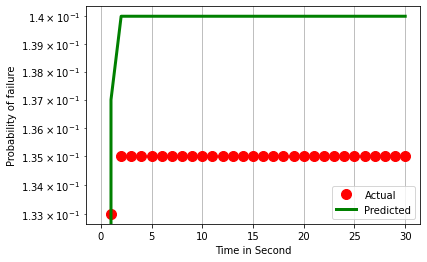

0.05157894736842106
Probabilty of Failure : 0.106


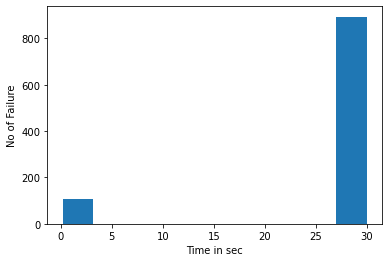

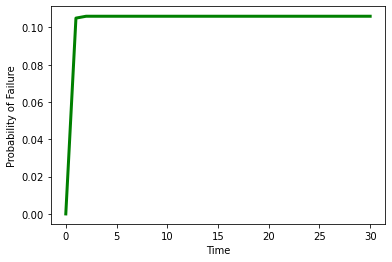

Probabilty of Failure : 0.113


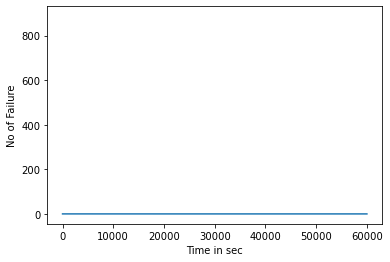

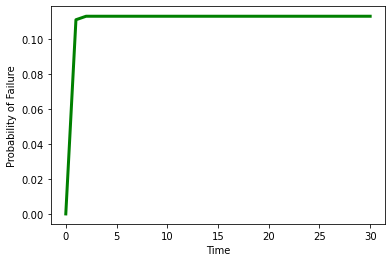

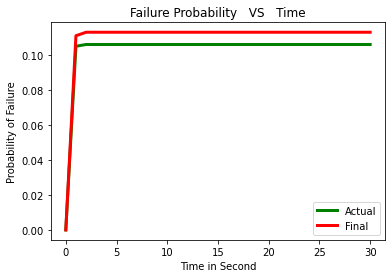

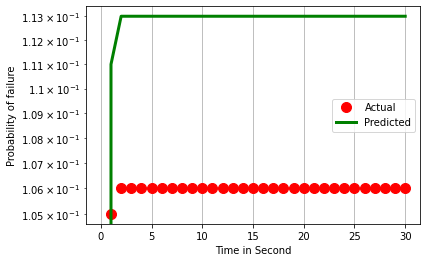

0.0518421052631579
Probabilty of Failure : 0.083


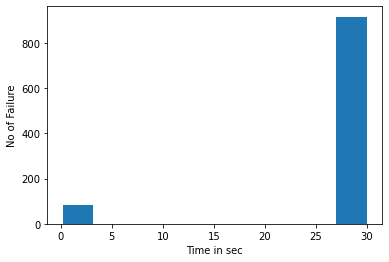

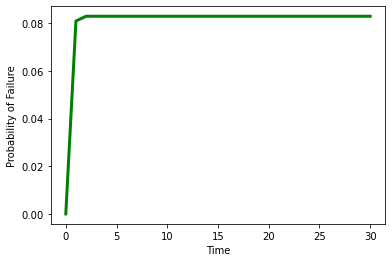

Probabilty of Failure : 0.087


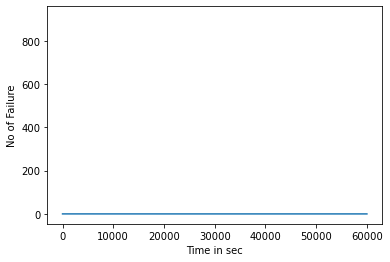

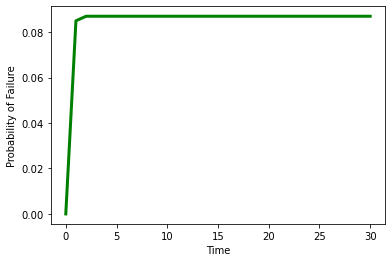

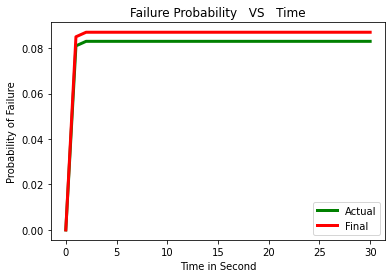

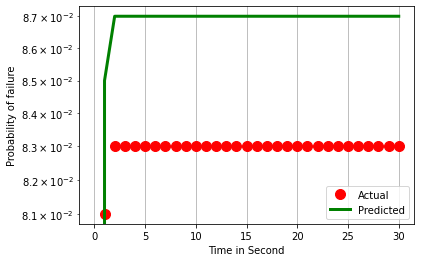

0.05210526315789474
Probabilty of Failure : 0.077


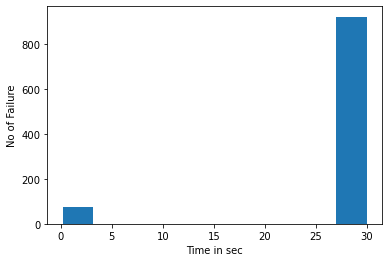

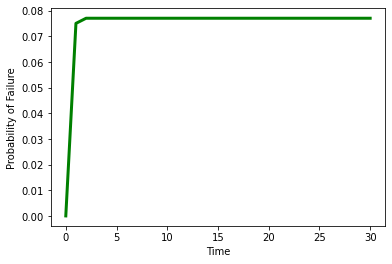

Probabilty of Failure : 0.078


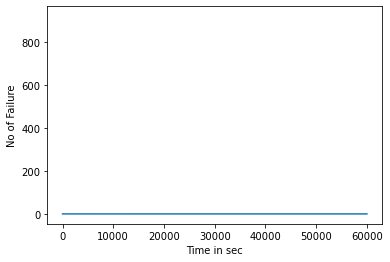

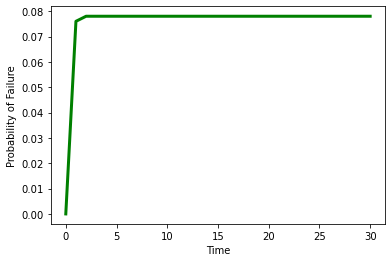

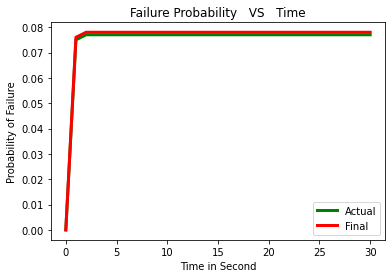

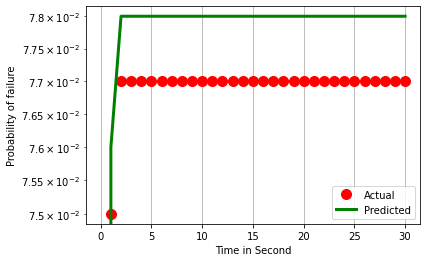

0.05236842105263158
Probabilty of Failure : 0.056


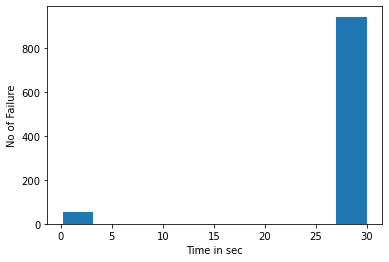

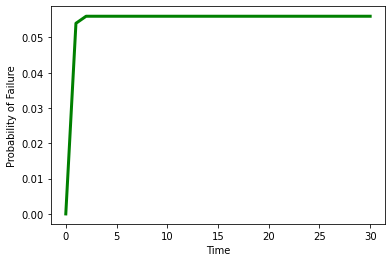

Probabilty of Failure : 0.062


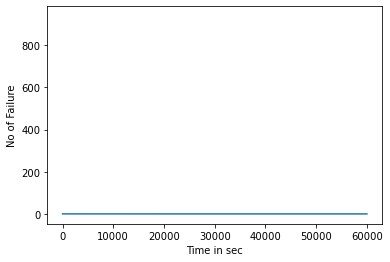

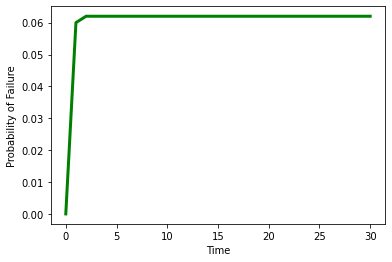

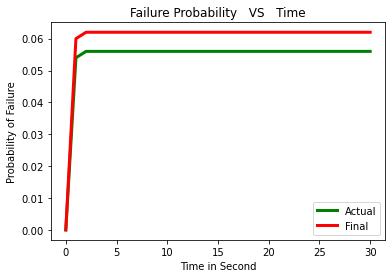

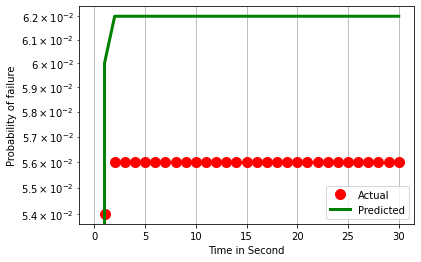

0.052631578947368425
Probabilty of Failure : 0.05


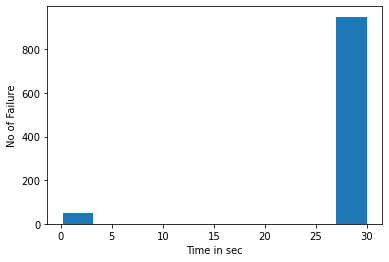

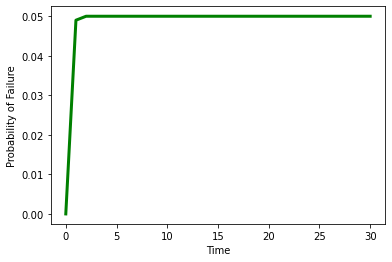

Probabilty of Failure : 0.052


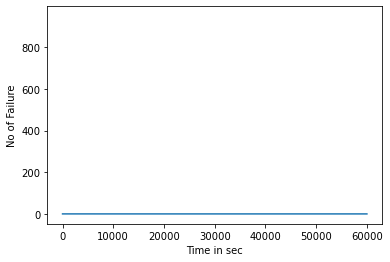

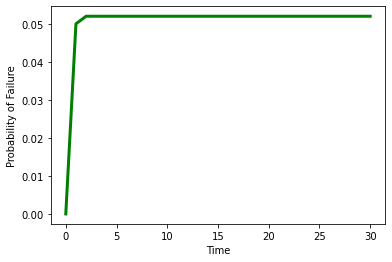

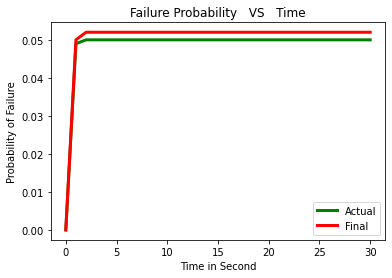

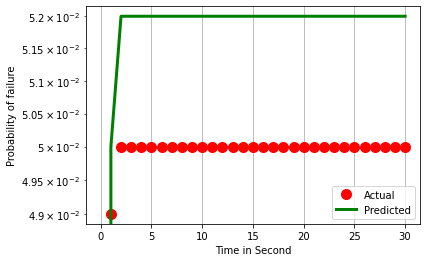

0.052894736842105265
Probabilty of Failure : 0.042


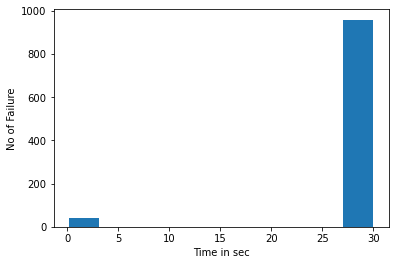

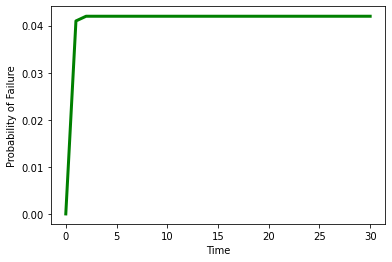

Probabilty of Failure : 0.044


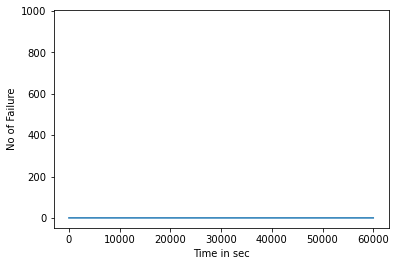

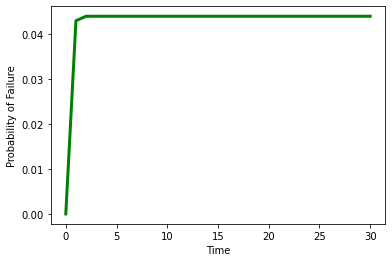

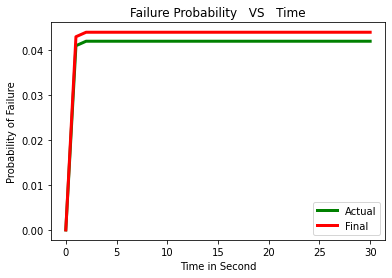

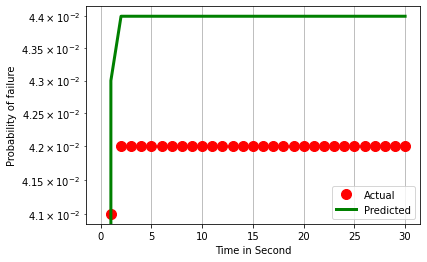

0.053157894736842105
Probabilty of Failure : 0.033


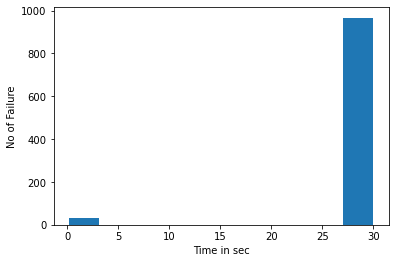

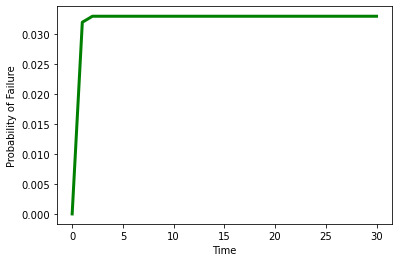

Probabilty of Failure : 0.035


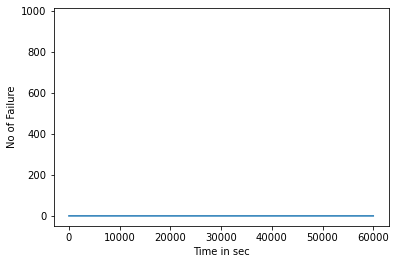

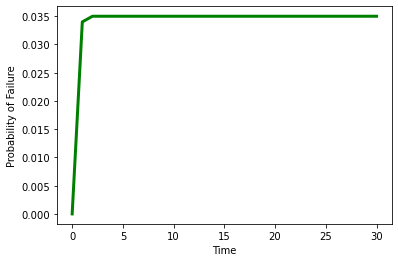

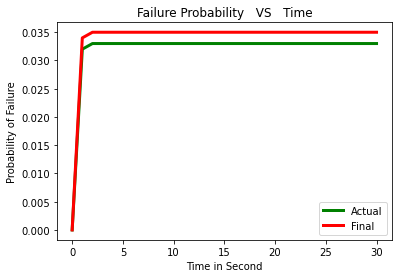

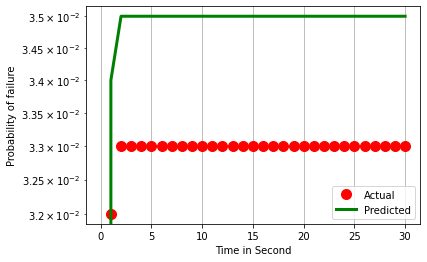

0.053421052631578946
Probabilty of Failure : 0.027


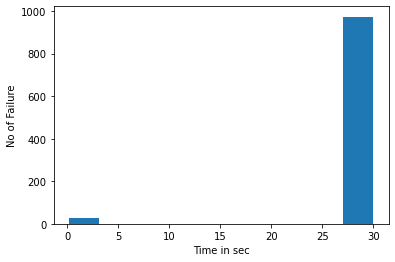

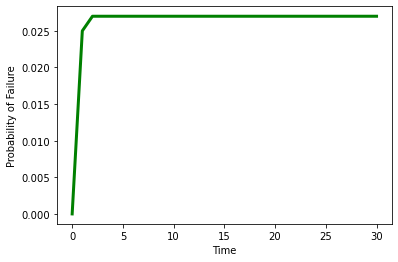

Probabilty of Failure : 0.03


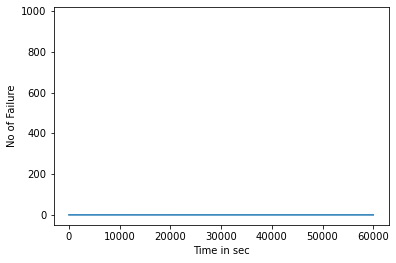

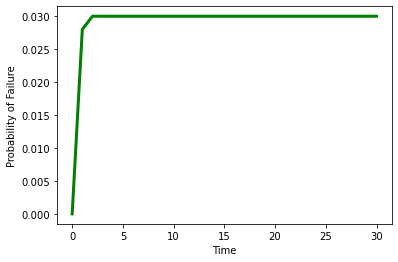

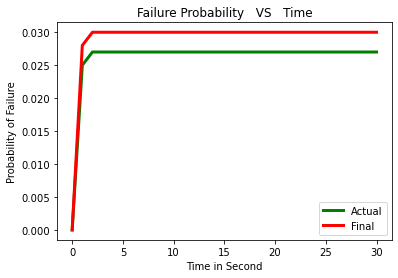

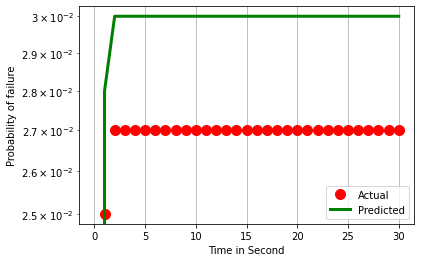

0.05368421052631579
Probabilty of Failure : 0.021


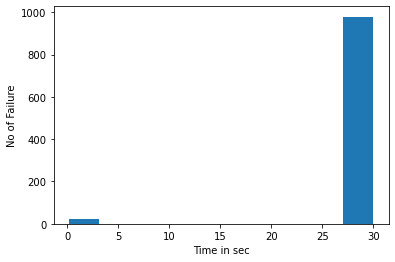

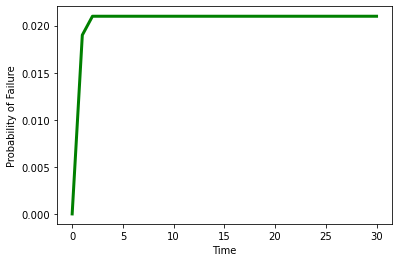

Probabilty of Failure : 0.022


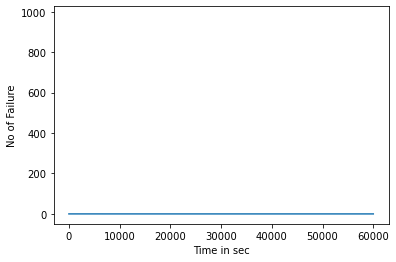

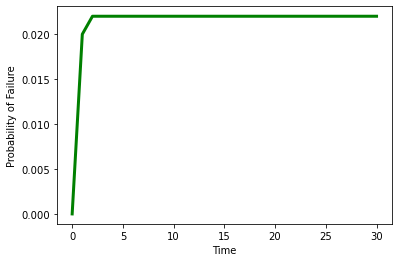

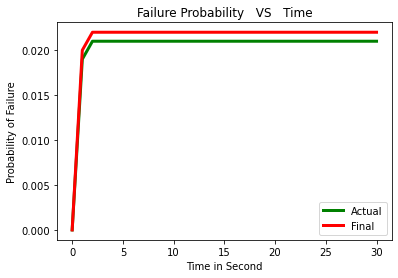

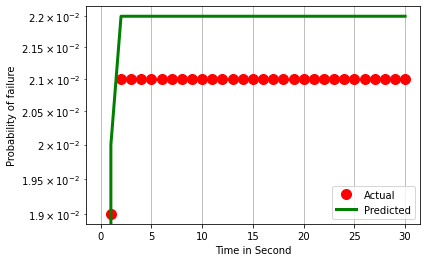

0.05394736842105263
Probabilty of Failure : 0.019


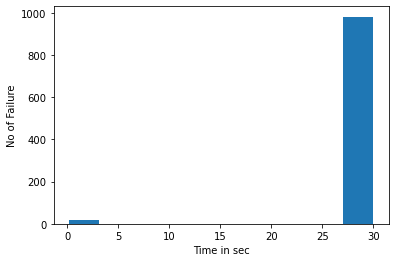

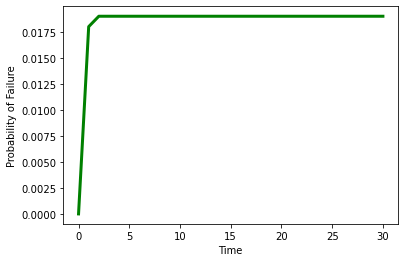

Probabilty of Failure : 0.02


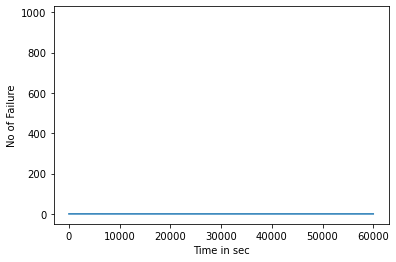

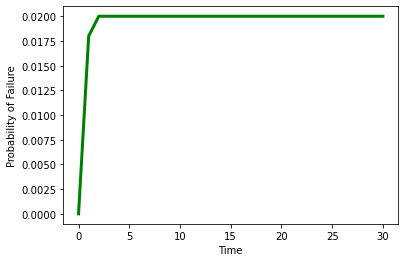

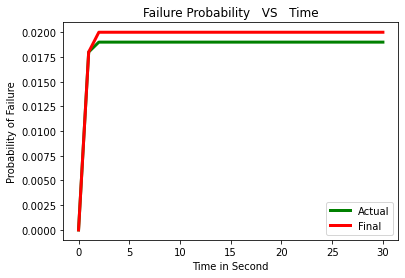

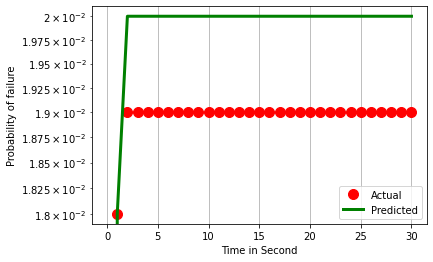

0.05421052631578947
Probabilty of Failure : 0.015


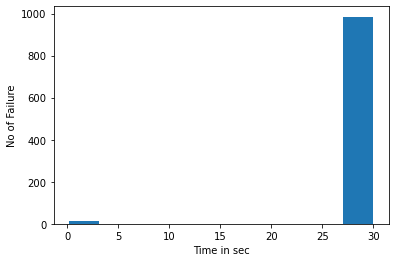

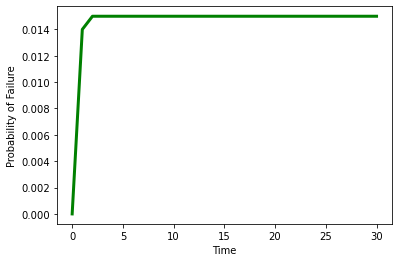

Probabilty of Failure : 0.016


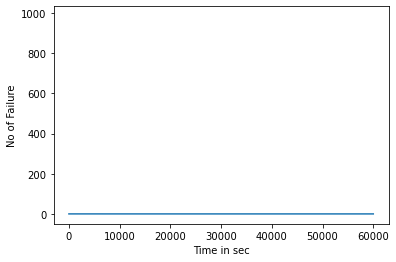

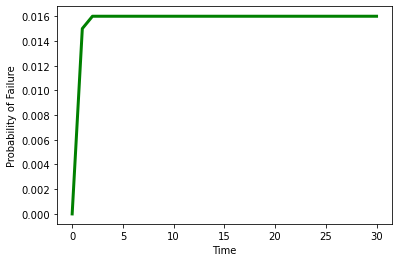

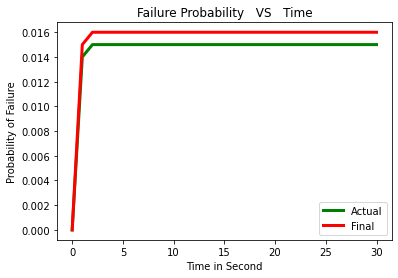

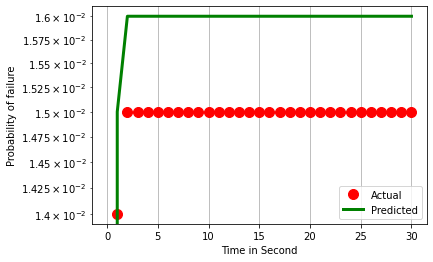

0.05447368421052631
Probabilty of Failure : 0.014


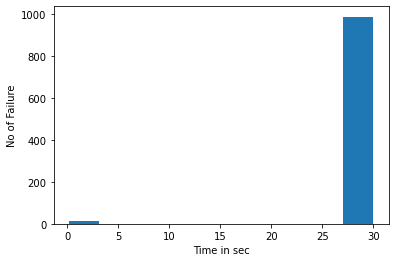

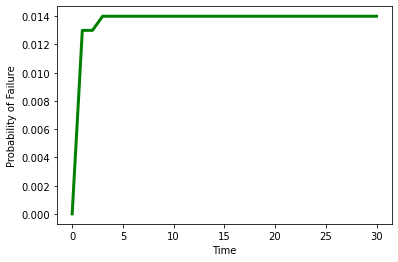

Probabilty of Failure : 0.015


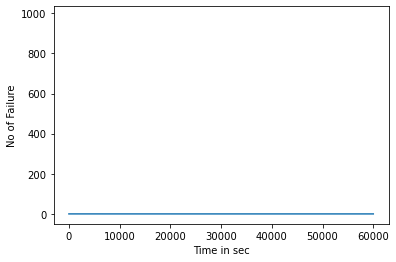

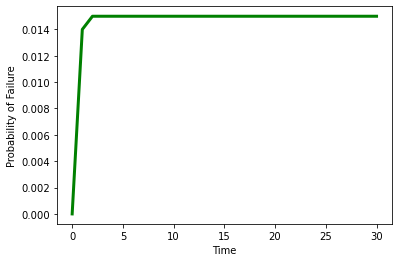

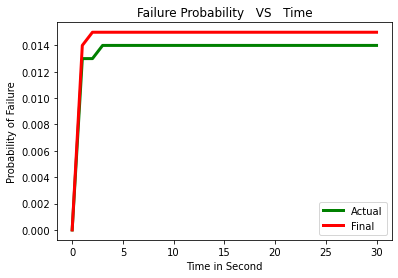

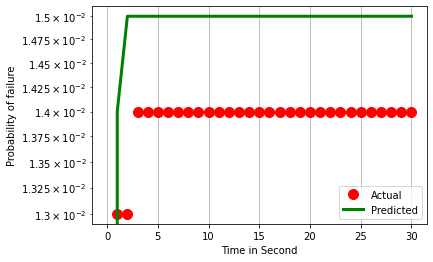

0.05473684210526316
Probabilty of Failure : 0.012


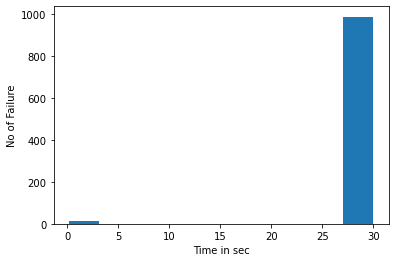

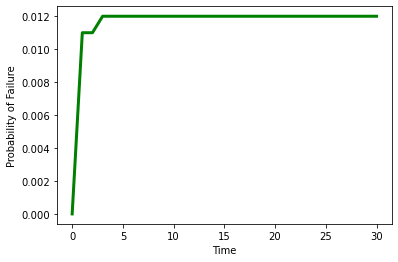

Probabilty of Failure : 0.013


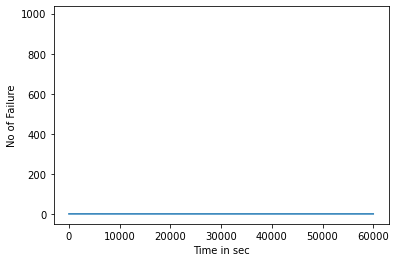

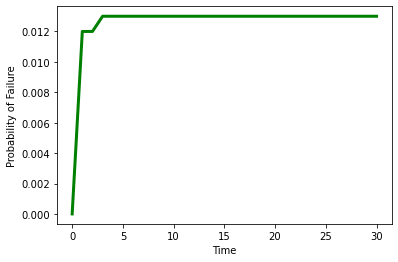

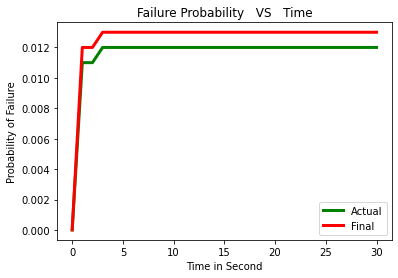

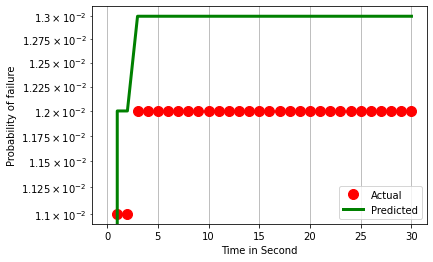

0.055
Probabilty of Failure : 0.011


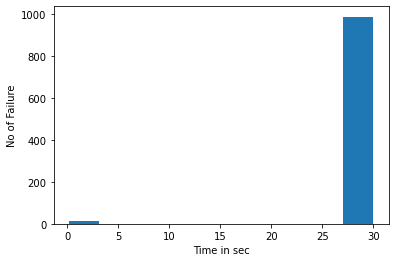

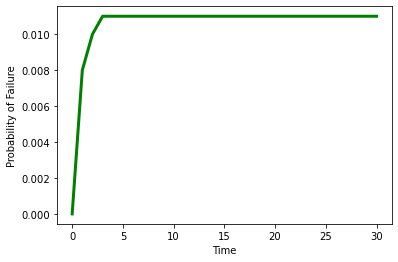

Probabilty of Failure : 0.012


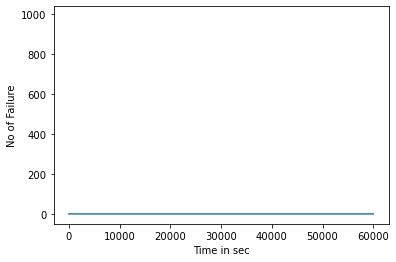

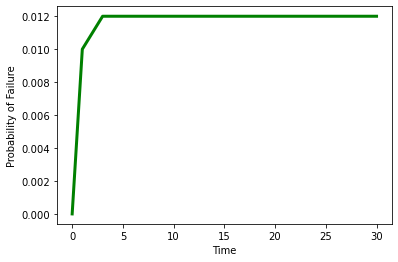

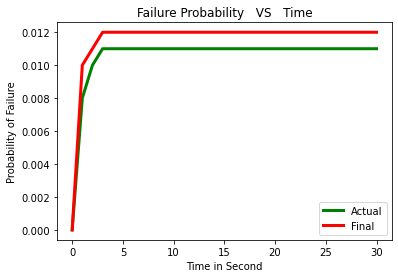

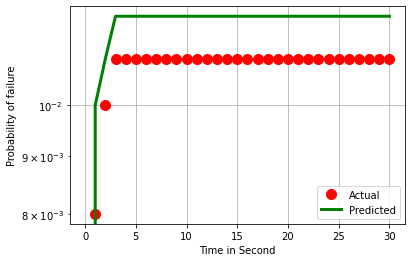

In [11]:
a = np.linspace(0.05,0.055,20)
ensem = 1000
for i in a:
    threshold = i
    print(i)
    idx = [np.where(y1_1[i,:]>threshold) for i in range(ensem)]

    count = 0
    for i in idx:
        if len(i[0])!=0:
            count += 1

    print("Probabilty of Failure :", count/len(idx))

    ans = []
    for i in idx:
        if len(i[0])!=0:
            ans.append((i[0][0])/2000)
        else:
            ans.append(60000/2000)

    plt.hist(ans)
    plt.xlabel('Time in sec')
    plt.ylabel('No of Failure')
    plt.show()

    pf_count_per_t = set()
    prob_fail = []
    for i in range(60001):
        colmn = y1_1[:,i]
        ans = np.where(colmn>threshold)
        for i in ans[0]:
            pf_count_per_t.add(i)

        no_of_fail = len(pf_count_per_t)
        prob_fail.append(no_of_fail/ensem)

    final_ans = []
    for i in range(len(prob_fail)):
        if i%2000 == 0:
            final_ans.append(prob_fail[i])

    plt.plot(final_ans, linewidth=3, color='green')
    plt.xlabel('Time')
    plt.ylabel('Probability of Failure')
    plt.show()

    final_1 = "Duffing_Final_relia_with_x.p"
    file_final_1 = open(final_1, 'rb')
    file_obj_final_1 = pickle.load(file_final_1)
    final_1 = np.array(file_obj_final_1)
    final_1.shape

    yf = final_1[0]
    # y9_2_f = final_2[8]

    yf.shape

    plt.plot(np.mean(yf, axis=0))

    idx_f = [np.where(yf[i,:]>threshold) for i in range(ensem)]
    count_f = 0
    for i in idx_f:
        if len(i[0])!=0:
            count_f += 1

    print("Probabilty of Failure :", count_f/len(idx_f))

    ans_f = []
    for i in idx_f:
        if len(i[0])!=0:
            ans_f.append((i[0][0])/2000)
        else:
            ans_f.append(60000/2000)

    plt.hist(ans_f)
    plt.xlabel('Time in sec')
    plt.ylabel('No of Failure')
    plt.show()


    pf_count_per_t_f = set()
    prob_fail_f = []
    for i in range(60001):
        colmn = yf[:,i]
        ans = np.where(colmn>threshold)
        for i in ans[0]:
            pf_count_per_t_f.add(i)

        no_of_fail_f = len(pf_count_per_t_f)
        prob_fail_f.append(no_of_fail_f/ensem)

    final_ans_f = []
    for i in range(len(prob_fail_f)):
        if i%2000 == 0:
            final_ans_f.append(prob_fail_f[i])

    plt.plot(final_ans_f, linewidth=3, color='green')
    plt.xlabel('Time')
    plt.ylabel('Probability of Failure')
    plt.show()

    plt.plot(final_ans, color='green', linewidth=3, label="Actual")
    plt.plot(final_ans_f, color='red', linewidth=3, label="Final")
    plt.xlabel('Time in Second')
    plt.ylabel('Probability of Failure')
    plt.legend()
    plt.title('Failure Probability   VS   Time')
    plt.show()

    max(final_ans), max(final_ans_f)

    plt.figure()
    plt.semilogy(final_ans, 'ro', label="Actual", markersize=10)
    plt.semilogy(final_ans_f,color='green' ,linewidth=3, label="Predicted")
    plt.xlabel('Time in Second')
    plt.ylabel('Probability of failure')
    plt.legend()
    plt.grid()
    plt.savefig('reliability duffing.pdf')
    plt.show()


In [12]:
no_of_fail

11

In [13]:
yf.shape

(1000, 60001)

In [14]:
a=np.linspace(0,30,60001)

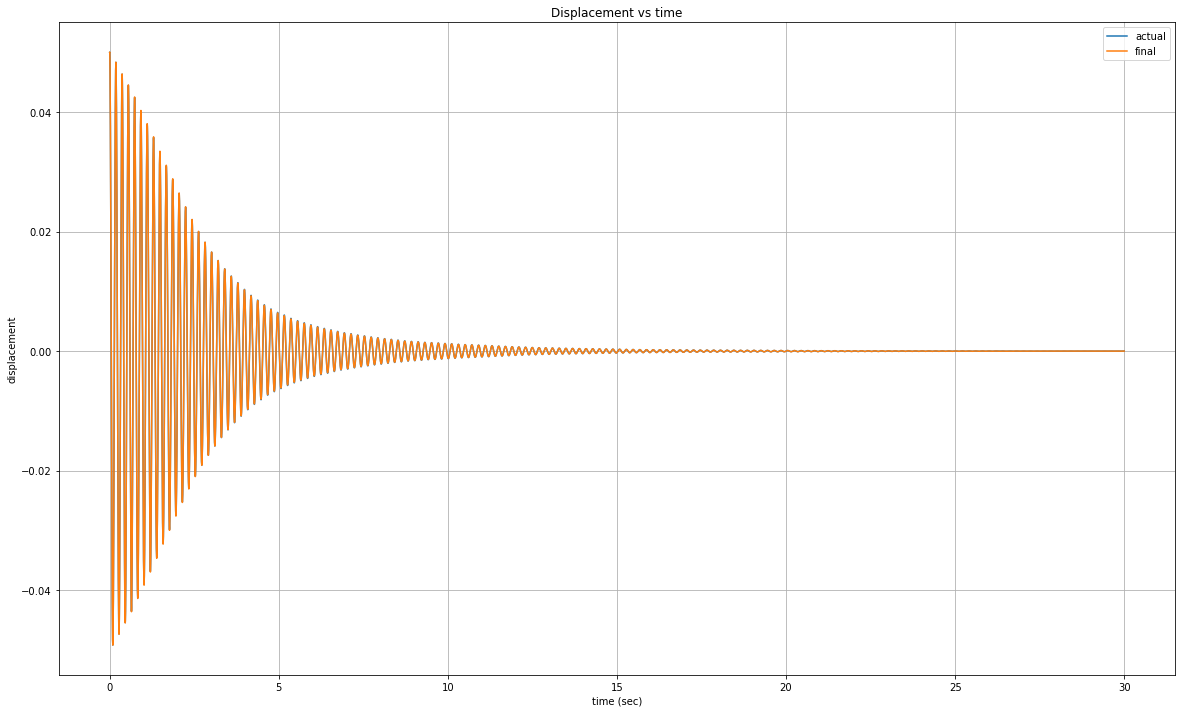

In [15]:
# plt.plot(np.mean(y1_1, axis=0))
plt.figure(figsize=(20,12))
plt.xlim()
plt.plot(a,np.mean(y1_1[:1000], axis=0),label='actual')
plt.plot(a,np.mean(y12[:1000], axis=0),label='final')
plt.title('Displacement vs time')
plt.xlabel('time (sec)')
plt.ylabel('displacement')
plt.legend()
plt.grid()
plt.savefig('states_tm.pdf')
plt.show()

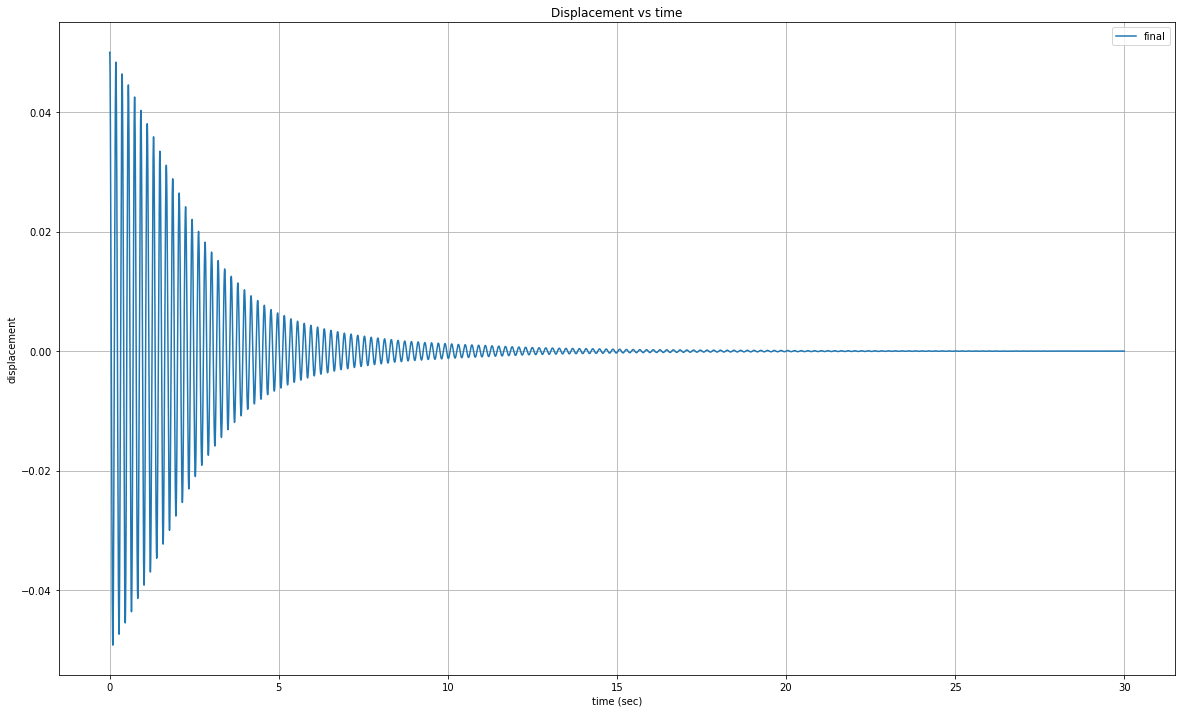

In [16]:
# plt.plot(np.mean(y1_1, axis=0))
plt.figure(figsize=(20,12))
plt.xlim()
# plt.plot(a,np.mean(y1_1[:100], axis=0),label='actual')
plt.plot(a,np.mean(y12[:1000], axis=0),label='final')
plt.title('Displacement vs time')
plt.xlabel('time (sec)')
plt.ylabel('displacement')
plt.legend()
plt.grid()
plt.savefig('states_tm.pdf')
plt.show()

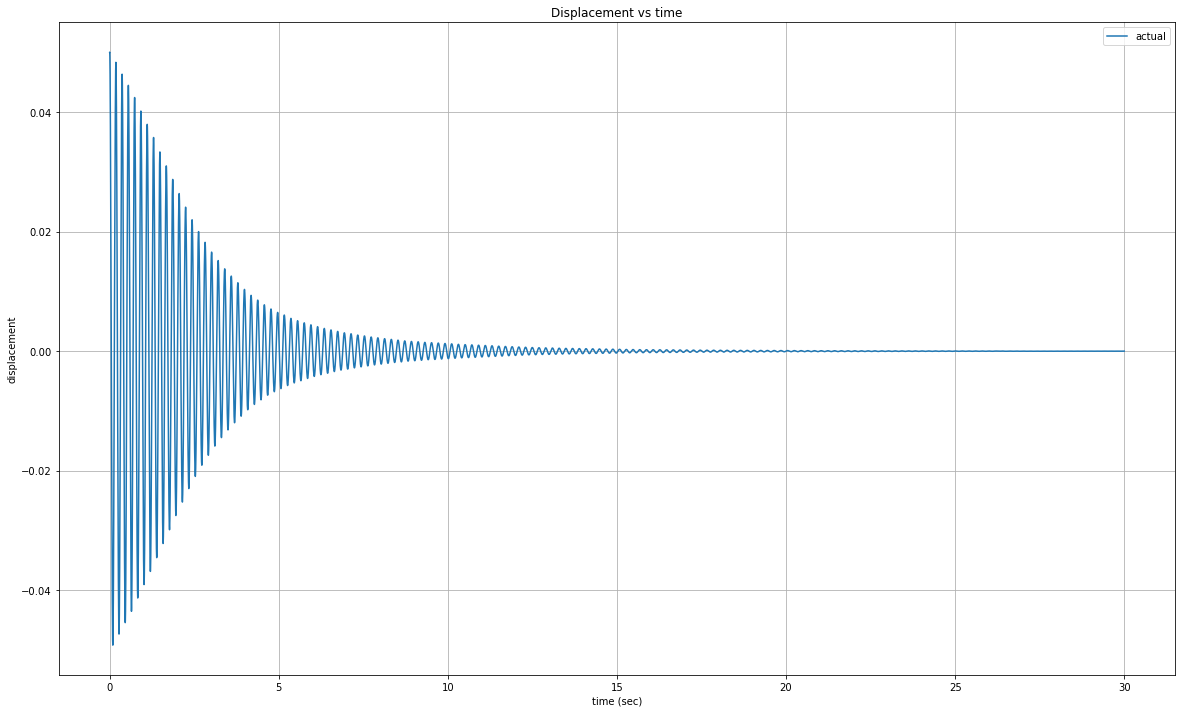

In [66]:
# plt.plot(np.mean(y1_1, axis=0))
plt.figure(figsize=(20,12))
plt.xlim()
plt.plot(a,np.mean(y1_1[:1000], axis=0),label='actual')
# plt.plot(a,np.mean(y12[:100], axis=0),label='final')
plt.title('Displacement vs time')
plt.xlabel('time (sec)')
plt.ylabel('displacement')
plt.legend()
plt.grid()
plt.savefig('states_tm.pdf')
plt.show()

In [72]:
final_1.shape

(2, 100, 60001)

Probabilty of Failure : 0.08


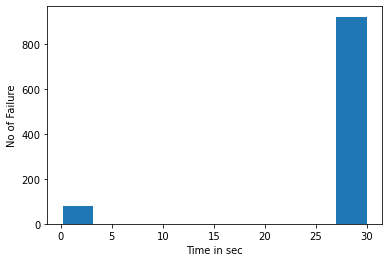

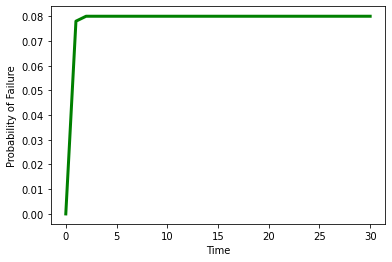

Probabilty of Failure : 0.081


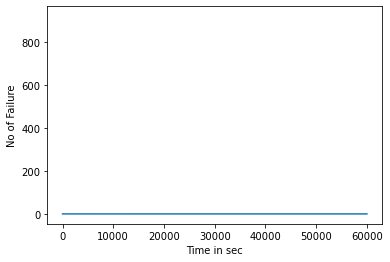

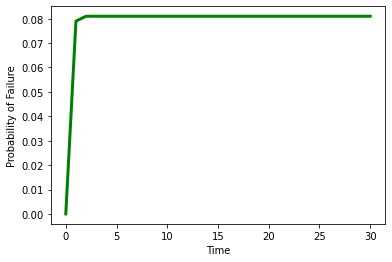

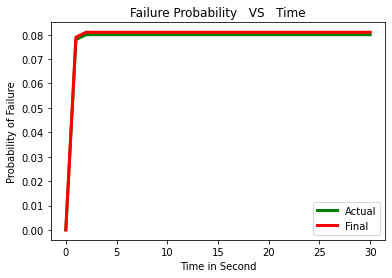

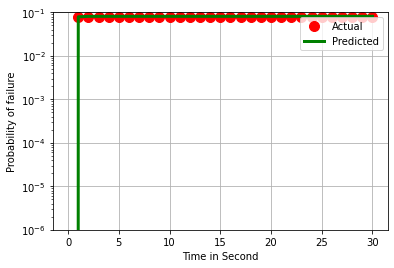

In [77]:
threshold = 0.052
# print(i)
ensem = 1000
idx = [np.where(y1_1[i,:]>threshold) for i in range(ensem)]
count = 0
for i in idx:
    if len(i[0])!=0:
        count += 1
print("Probabilty of Failure :", count/len(idx))

ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/2000)
    else:
        ans.append(60000/2000)
plt.hist(ans)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()
pf_count_per_t = set()
prob_fail = []
for i in range(60001):
    colmn = y1_1[:,i]
    ans = np.where(colmn>threshold)
    for i in ans[0]:
        pf_count_per_t.add(i)
    no_of_fail = len(pf_count_per_t)
    prob_fail.append(no_of_fail/ensem)
final_ans = []
for i in range(len(prob_fail)):
    if i%2000 == 0:
        final_ans.append(prob_fail[i])
plt.plot(final_ans, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()

final_1 = "Duffing_Final_relia_with_x.p"
file_final_1 = open(final_1, 'rb')
file_obj_final_1 = pickle.load(file_final_1)
final_1 = np.array(file_obj_final_1)
final_1.shape
yf = final_1[0]
# y9_2_f = final_2[8]
yf.shape
plt.plot(np.mean(yf, axis=0))
idx_f = [np.where(yf[i,:]>threshold) for i in range(ensem)]
count_f = 0
for i in idx_f:
    if len(i[0])!=0:
        count_f += 1
print("Probabilty of Failure :", count_f/len(idx_f))
ans_f = []
for i in idx_f:
    if len(i[0])!=0:
        ans_f.append((i[0][0])/2000)
    else:
        ans_f.append(60000/2000)
plt.hist(ans_f)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()

pf_count_per_t_f = set()
prob_fail_f = []
for i in range(60001):
    colmn = yf[:,i]
    ans = np.where(colmn>threshold)
    for i in ans[0]:
        pf_count_per_t_f.add(i)
    no_of_fail_f = len(pf_count_per_t_f)
    prob_fail_f.append(no_of_fail_f/ensem)
final_ans_f = []
for i in range(len(prob_fail_f)):
    if i%2000 == 0:
        final_ans_f.append(prob_fail_f[i])
plt.plot(final_ans_f, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()
plt.plot(final_ans, color='green', linewidth=3, label="Actual")
plt.plot(final_ans_f, color='red', linewidth=3, label="Final")
plt.xlabel('Time in Second')
plt.ylabel('Probability of Failure')
plt.legend()
plt.title('Failure Probability   VS   Time')
plt.show()

max(final_ans), max(final_ans_f)
plt.figure()
plt.semilogy(final_ans, 'ro', label="Actual", markersize=10)
plt.semilogy(final_ans_f,color='green' ,linewidth=3, label="Predicted")
plt.xlabel('Time in Second')
plt.ylabel('Probability of failure')
plt.ylim([1e-6,0.1])
plt.legend()
plt.grid()
plt.savefig('reliability duffing.pdf')
plt.show()

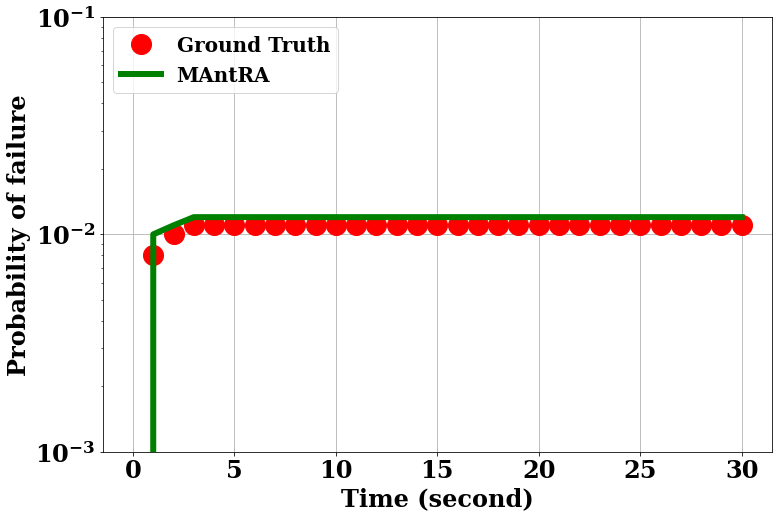

In [22]:

plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 24
plt.figure(figsize = (12,8 ))
plt.semilogy(final_ans, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_ans_f,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.ylim([1e-3,0.1])
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=2)
plt.grid()
plt.savefig('reliability duffing_x.pdf')
plt.show()